# **Data Modeling**


---



---



- Testing, adding more comments
- import data
- Pre-processing, Training
- Split Train/Test
- Text Mining Steps:
1. Tokenization is the first step in NLP. It is the process of breaking strings into tokens, which in turn are small structures or units
2. Stemming usually refers to normalizing words into its base form or root form
3. Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.
- ML Models building, multiple models
- Evaluations metrics
- Identify the best fit model
-  Conclusion

## Uploads

In [1]:
from google.colab import files
upload=files.upload()

Saving new_corona_NLP_train.csv to new_corona_NLP_train.csv


## Importing Libraries

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import string

# OS services
import os

# Save file
# from sb_utils import save_file

#Natural language toolkit
import nltk
import nltk.corpus
from nltk.stem import LancasterStemmer

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as plotly
import plotly.express as px
from plotly import __version__
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot 
init_notebook_mode(connected=True)

# Set default font size
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
# from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.feature_extraction.text import CountVectorizer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train, test, split
from sklearn.model_selection import train_test_split


# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import xgboost as xgb
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import LinearSVC


# Evaluation of model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Statistical function
from scipy.stats import norm
from tabulate import tabulate

# Miscellaneous
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage

## Data Info

In [2]:
data_twitter_corona_train = pd.read_csv('/content/new_corona_NLP_train.csv', encoding= 'latin-1')
#data_twitter_corona_test = pd.read_csv('/content/Corona_NLP_test.csv', encoding= 'latin-1')

In [3]:
original_data_train = pd.read_csv('/content/new_corona_NLP_train.csv', encoding= 'latin-1')

In [4]:
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,NaN,1,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,"Me, ready to go at supermarket during the #COV..."


In [5]:
original_data_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,NaN,1,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,"Me, ready to go at supermarket during the #COV..."


In [6]:
data_twitter_corona_train.shape

(41157, 7)

In [7]:
original_data_train.shape

(41157, 7)

In [8]:
import re
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization

In [9]:
# Tokenizing the words present in the training set
tokenized_tweet = data_twitter_corona_train['text'].apply(lambda x: x.split()) 

## Data Cleaning and Organization

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and training datasets
data_twitter_corona_train['text'] = data_twitter_corona_train['text'].apply(lambda x: clean_text(x))

# test['text'] = test['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
data_twitter_corona_train['text'].head()

0               menyrbie philgahan chrisitv  and  and 
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the  outb...
Name: text, dtype: object

In [11]:
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,3799,48751,London,16-03-2020,NaN,1,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,me ready to go at supermarket during the outb...


In [12]:
data_twitter_corona_train['clean_text']=data_twitter_corona_train['text'].apply(clean_text)
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_text
0,3799,48751,London,16-03-2020,NaN,1,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,me ready to go at supermarket during the outb...,me ready to go at supermarket during the outb...


In [13]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from collections import defaultdict
from collections import  Counter
stop=set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
data_twitter_corona_train['clean_text'] = data_twitter_corona_train['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_text
0,3799,48751,London,16-03-2020,NaN,1,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths to give elder...,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,my food stock is not the only one which is emp...,food stock one empty please dont panic enough ...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,me ready to go at supermarket during the outb...,ready go supermarket outbreak im paranoid food...


In [15]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Lemmatization
Stemming is a rule-based approach, whereas lemmatization is a canonical dictionary-based approach.
Lemmatization has higher accuracy than stemming.
Lemmatization is preferred for context analysis, whereas stemming is recommended when the context is not important.

In [16]:
lemmation_data = WordNetLemmatizer()

def preprocessdata(text):
    text= ' '.join(lemmation_data.lemmatize(word) for word in text.split(' '))
    return text

data_twitter_corona_train['final_text']=data_twitter_corona_train['clean_text'].apply(preprocessdata)
data_twitter_corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,clean_text,final_text
0,3799,48751,London,16-03-2020,NaN,1,menyrbie philgahan chrisitv and and,menyrbie philgahan chrisitv,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,2,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,2,coronavirus australia woolworths to give elder...,coronavirus australia woolworths give elderly ...,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",2,my food stock is not the only one which is emp...,food stock one empty please dont panic enough ...,food stock one empty please dont panic enough ...
4,3803,48755,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",0,me ready to go at supermarket during the outb...,ready go supermarket outbreak im paranoid food...,ready go supermarket outbreak im paranoid food...


## Extraction and Feature Selection

In [17]:
# Splitting data into features(X) and targets(y)
X = data_twitter_corona_train['final_text']
y = data_twitter_corona_train['Sentiment'].values

## Train-Test Split

In [18]:
# splitting the training data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
X_train.shape, y_train.shape

((32925,), (32925,))

In [20]:
X_test.shape, y_test.shape

((8232,), (8232,))

## TF-IDF
Term Frequency – Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents. 


CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.

In [21]:
tfidf = TfidfVectorizer()
#X_train = tfidf.fit_transform(X_train).toarray()

X_train = tfidf.fit_transform(X_train)

#X_test = tfidf.transform(X_test).toarray()

X_test = tfidf.transform(X_test)

Issues faced: Used all the RAM, system crashes
Your session crashed after using all available RAM.

System RAM
5.0 / 12.7 GB
 
Disk
23.5 / 107.7 GB


# Machine Learing Models

## 1. Random Forest Classifier

In [22]:
#model_rf = RandomForestClassifier(max_depth=50) # lower the max depth to reduce memory usage, default is 100
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [23]:
print("Training Accuracy :", model_rf.score(X_train, y_train))
print("Testing/Validation Accuracy :", model_rf.score(X_test, y_test))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)   # labels=[1,0]
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_rf)

Training Accuracy : 0.9998785117691723
Testing/Validation Accuracy : 0.7459912536443148

 [[2177  251  634]
 [ 230 1007  316]
 [ 457  203 2957]]


Increase in max_depth increases the training and testing accuracy.

There are 4-potential outcomes here, 

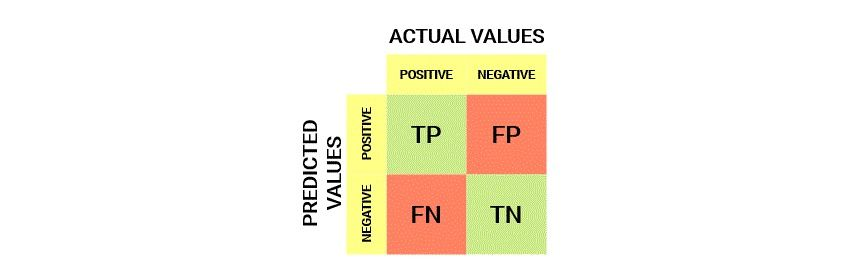

True positive (TP), False positive (FP), False negative (FN), True negative (TN)

In [27]:
class_report_random_forest = classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive'])

In [28]:
print(class_report_random_forest)

              precision    recall  f1-score   support

    Negative       0.76      0.71      0.73      3062
     Neutral       0.69      0.65      0.67      1553
    Positive       0.76      0.82      0.79      3617

    accuracy                           0.75      8232
   macro avg       0.74      0.73      0.73      8232
weighted avg       0.75      0.75      0.74      8232



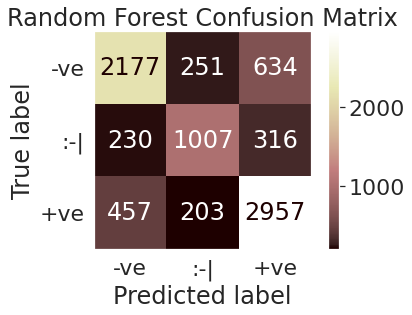

In [33]:
cm_display_rf = metrics.ConfusionMatrixDisplay(cm_rf, display_labels = ['-ve', ':-|', '+ve'])
cm_display_rf.plot(include_values=True, cmap = 'pink')
#cm_display.plot(cmap = 'pink')
plt.grid(False)
plt.title('Random Forest Confusion Matrix')
plt.show()

## 2. Naive Bayes Classifier

In [34]:
model_naive_bayes = MultinomialNB()

model_naive_bayes.fit(X_train,y_train)

NB_prediction = model_naive_bayes.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy : ",model_naive_bayes.score(X_train,y_train))
print("Testing/Validation accuracy : ",NB_accuracy )

# Confusion matrix
cm_nb = confusion_matrix(y_test, NB_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_nb)

print(classification_report(NB_prediction,y_test, target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.7351556567957479
Testing/Validation accuracy :  0.6410349854227405

 [[1966    4 1092]
 [ 392   25 1136]
 [ 329    2 3286]]
              precision    recall  f1-score   support

    Negative       0.64      0.73      0.68      2687
     Neutral       0.02      0.81      0.03        31
    Positive       0.91      0.60      0.72      5514

    accuracy                           0.64      8232
   macro avg       0.52      0.71      0.48      8232
weighted avg       0.82      0.64      0.71      8232



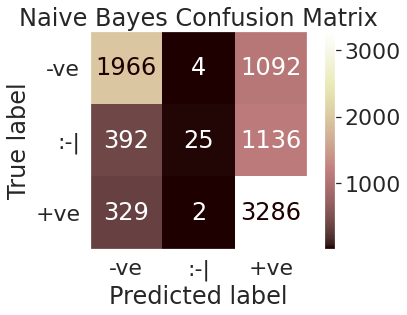

In [35]:
cm_display_nb = metrics.ConfusionMatrixDisplay(cm_nb, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_nb.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

## 3. Stochastic Gradient Descent Classifier

In [36]:
model_sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

model_sgd_clf.fit(X_train,y_train)

sgd_prediction = model_sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy  : ",model_sgd_clf.score(X_train,y_train))
print("Test/Validation accuracy : ",sgd_accuracy )
# Confusion matrix
cm_sgd = confusion_matrix(y_test, sgd_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_sgd)

print(classification_report(sgd_prediction,y_test,target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy  :  0.8704935459377373
Test/Validation accuracy :  0.7776967930029155

 [[2490   89  483]
 [ 371  722  460]
 [ 350   77 3190]]
              precision    recall  f1-score   support

    Negative       0.81      0.78      0.79      3211
     Neutral       0.46      0.81      0.59       888
    Positive       0.88      0.77      0.82      4133

    accuracy                           0.78      8232
   macro avg       0.72      0.79      0.74      8232
weighted avg       0.81      0.78      0.79      8232



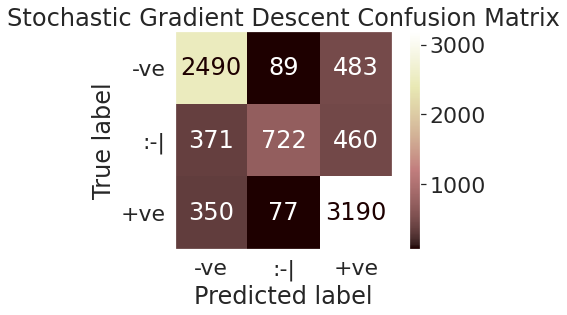

In [37]:
cm_display_sgd = metrics.ConfusionMatrixDisplay(cm_sgd, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_sgd.plot(include_values=True, cmap = 'pink')
#cm_display.plot(cmap = 'pink')
plt.grid(False)
plt.title('Stochastic Gradient Descent Confusion Matrix')
plt.show()

## 4. Extreme Gradient Boosting Classifier

In [38]:
model_xgboost = xgb.XGBClassifier()

model_xgboost.fit(X_train, y_train)

xgb_prediction = model_xgboost.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy : ",model_xgboost.score(X_train,y_train))
print("Test/Validation accuracy : ",xgb_accuracy )

# Confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_xgb)

print(classification_report(xgb_prediction,y_test, target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.6456795747911921
Test/Validation accuracy :  0.6381195335276968

 [[1836  159 1067]
 [ 264  426  863]
 [ 484  142 2991]]
              precision    recall  f1-score   support

    Negative       0.60      0.71      0.65      2584
     Neutral       0.27      0.59      0.37       727
    Positive       0.83      0.61      0.70      4921

    accuracy                           0.64      8232
   macro avg       0.57      0.63      0.57      8232
weighted avg       0.71      0.64      0.66      8232



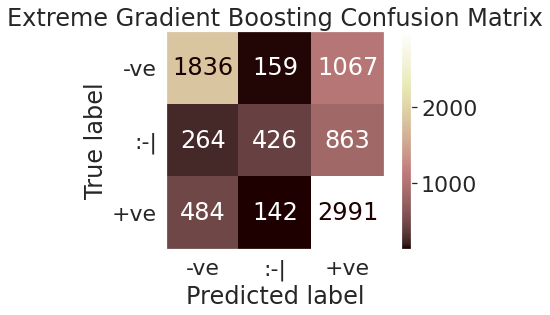

In [39]:
cm_display_xgb = metrics.ConfusionMatrixDisplay(cm_xgb, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_xgb.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Extreme Gradient Boosting Confusion Matrix')
plt.show()

## 5. Logistic Regression Classifier

In [40]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

logreg_prediction = model_logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy : ",model_logreg.score(X_train,y_train))
print("Test/Validation accuracy : ",logreg_accuracy )

# Confusion matrix
cm_logreg = confusion_matrix(y_test, logreg_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_logreg)

print(classification_report(logreg_prediction,y_test, target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.9025360668185269
Test/Validation accuracy :  0.7874149659863946

 [[2462  178  422]
 [ 311  891  351]
 [ 346  142 3129]]
              precision    recall  f1-score   support

    Negative       0.80      0.79      0.80      3119
     Neutral       0.57      0.74      0.64      1211
    Positive       0.87      0.80      0.83      3902

    accuracy                           0.79      8232
   macro avg       0.75      0.78      0.76      8232
weighted avg       0.80      0.79      0.79      8232



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



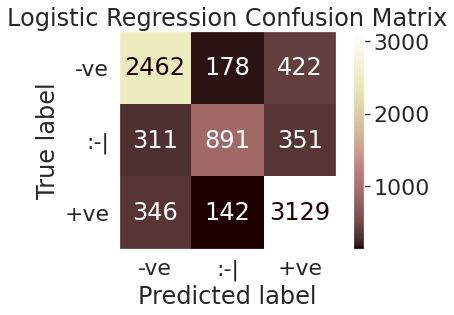

In [41]:
cm_display_logreg = metrics.ConfusionMatrixDisplay(cm_logreg, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_logreg.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## 6. Support Vector Machine Classifier

In [44]:
model_svc = SVC()   # ran over 20-min to complete

model_svc.fit(X_train, y_train)

svc_prediction = model_svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy : ",model_svc.score(X_train,y_train))
print("Test/Validation accuracy : ",svc_accuracy)

# Confusion matrix
cm_svc = confusion_matrix(y_test, svc_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_svc)

print(classification_report(svc_prediction,y_test, target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.9786788154897494
Test/Validation accuracy :  0.7776967930029155

 [[2458  159  445]
 [ 339  847  367]
 [ 390  130 3097]]
              precision    recall  f1-score   support

    Negative       0.80      0.77      0.79      3187
     Neutral       0.55      0.75      0.63      1136
    Positive       0.86      0.79      0.82      3909

    accuracy                           0.78      8232
   macro avg       0.73      0.77      0.75      8232
weighted avg       0.79      0.78      0.78      8232



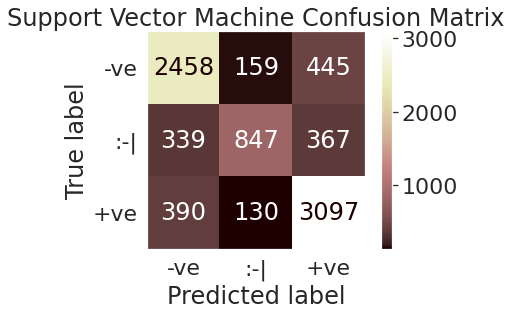

In [45]:
cm_display_svc = metrics.ConfusionMatrixDisplay(cm_svc, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_svc.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

## 7. Linear Support Vector Machine Classifier

In [42]:
model_linear_svc = LinearSVC()

model_linear_svc.fit(X_train, y_train)

lsvc_prediction = model_linear_svc.predict(X_test)
lsvc_accuracy = accuracy_score(y_test,lsvc_prediction)
print("Training accuracy : ",model_linear_svc.score(X_train,y_train))
print("Test/Validation accuracy : ",lsvc_accuracy)

# Confusion matrix
cm_lsvc = confusion_matrix(y_test, lsvc_prediction) # labels=[1,0])
#print('\n[[ TP FP]')
#print('[ FN TN]]')
print('\n',cm_lsvc)

print(classification_report(lsvc_prediction,y_test,target_names=['Negative', 'Neutral', 'Positive']))

Training accuracy :  0.9705087319665907
Test/Validation accuracy :  0.7993197278911565

 [[2491  184  387]
 [ 263  986  304]
 [ 319  195 3103]]
              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81      3073
     Neutral       0.63      0.72      0.68      1365
    Positive       0.86      0.82      0.84      3794

    accuracy                           0.80      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



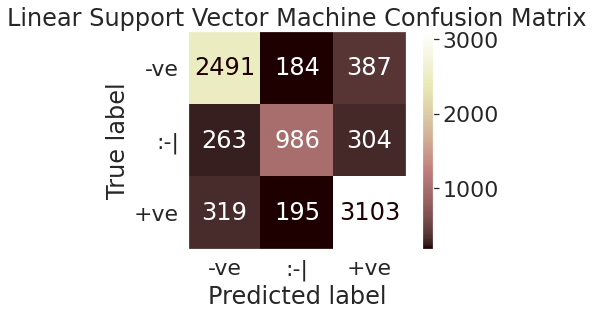

In [43]:
cm_display_lsvc = metrics.ConfusionMatrixDisplay(cm_lsvc, display_labels = ['-ve', ':-|', '+ve']) # display_labels = [True, False])
cm_display_lsvc.plot(include_values=True, cmap = 'pink')
plt.grid(False)
plt.title('Linear Support Vector Machine Confusion Matrix')
plt.show()

In [46]:
true_positives = np.sum(y_test * lsvc_prediction)
false_positives = np.sum((1 - y_test) * lsvc_prediction)
false_negatives = np.sum(y_test * (1 - lsvc_prediction))
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

In [47]:
precision

1.6079526415726573

In [48]:
recall

1.638329350176397

In [49]:
f1_score_new = 2 * (precision * recall) / (precision + recall)
f1_score_new

1.622998872604284